In [13]:
import matplotlib.pyplot as plt
from matplotlib import figure
import numpy as np
import os
import json
import geoio
import geopandas as gpd
from shapely import speedups
speedups.disable()

from shapely.ops import unary_union
# import solaris from the git submodule
import utils.solaris.solaris as sol


import warnings
warnings.filterwarnings('ignore')

In [2]:
! python --version

Python 3.8.13


In [3]:
SATELLITE_IMAGERY_PATH = 'data/AOI_1_rio/3band'
GEOJSON_PATH = 'data/AOI_1_rio/geojson'

satellite_files = os.listdir(SATELLITE_IMAGERY_PATH)
geojson_files = os.listdir(GEOJSON_PATH)

## Exploring the raster images and geojson files

In [4]:
filename = 'AOI_1_RIO_img1200'

In [5]:
tiff_file = geoio.GeoImage(f'{SATELLITE_IMAGERY_PATH}/3band_{filename}.tif')
tiff_file

Class Name        : GeoImage
Driver Name       : GTiff
Data Type         : Byte
File Name         : data/AOI_1_rio/3band/3band_AOI_1_RIO_img1200.tif
File List         : ['data/AOI_1_rio/3band/3band_AOI_1_RIO_img1200.tif']
Dimensions        : (3, 438, 406) (nlayers, nrows, ncols)
Resolution        : (4.492803424668782e-06, 4.488135960586333e-06) (x,y)
Extent            : (-43.7045504804, -22.9679045891, -43.7025826325,
                    -22.9697267723) (ul_x, ul_y, lr_x, lr_y)
Projection String : GEOGCS["WGS 84",
                     DATUM["WGS_1984",
                         SPHEROID["WGS 84",6378137,298.257223563,
                             AUTHORITY["EPSG","7030"]],
                         AUTHORITY["EPSG","6326"]],
                     PRIMEM["Greenwich",0],
                     UNIT["degree",0.0174532925199433,
                         AUTHORITY["EPSG","9122"]],
                     AXIS["Latitude",NORTH],
                     AXIS["Longitude",EAST],
                     AUTHO

Shape: (406, 438, 3)


(-0.5, 437.5, 405.5, -0.5)

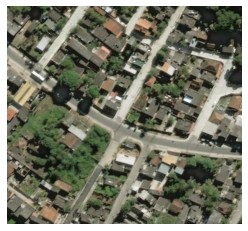

In [6]:
img_data = tiff_file.get_data()
# move the band channel to the end, to get a proper image shape
img_data = np.moveaxis(img_data, 0,-1)
print(f'Shape: {img_data.shape}')
plt.imshow(img_data)
plt.axis(False)

In [7]:
# geojson
geojson_data = gpd.read_file(f'{GEOJSON_PATH}/Geo_{filename}.geojson')
geojson_data

,timestamp,version,changeset,user,uid,HGIS_OID,building,type,id,area,QAStatus,HGISOID,TaskArea,Revision1,Shape_Leng,Shape_Area,partialBuilding,partialDec,geometry
0,2016-06-22 21:18:18+00:00,1,5404,Derick,43,986551.0,yes,None,way/67775,None,Original_Building,986551.0,West,No,0.000705,0.0,1.0,0.751214,"POLYGON Z ((-43.70269 -22.96898 0.00000, -43.7..."
1,2016-06-22 21:22:25+00:00,1,5404,Derick,43,997267.0,yes,None,way/70520,None,Original_Building,997267.0,West,No,0.000370,0.0,0.0,1.000000,"POLYGON Z ((-43.70423 -22.96815 0.00000, -43.7..."
2,2016-06-22 21:22:55+00:00,1,5404,Derick,43,986250.0,yes,None,way/70983,None,Original_Building,986250.0,West,No,0.000224,0.0,0.0,1.000000,"POLYGON Z ((-43.70436 -22.96849 0.00000, -43.7..."
3,2016-06-22 21:23:10+00:00,1,5404,Derick,43,997630.0,yes,None,way/71195,None,Original_Building,997630.0,West,No,0.000275,0.0,0.0,1.000000,"POLYGON Z ((-43.70358 -22.96829 0.00000, -43.7..."
4,2016-06-22 21:23:29+00:00,1,5404,Derick,43,986711.0,yes,None,way/71484,None,Original_Building,986711.0,West,No,0.000298,0.0,1.0,0.881914,"POLYGON Z ((-43.70295 -22.96973 0.00000, -43.7..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133,2016-07-15 00:11:50+00:00,1,12063,shelbert23,1089,None,yes,None,way/448946,None,New_Building_Rev1,0.0,West,Yes,0.000310,0.0,0.0,1.000000,"POLYGON Z ((-43.70303 -22.96954 0.00000, -43.7..."
134,2016-07-15 00:11:50+00:00,1,12063,shelbert23,1089,None,yes,None,way/448947,None,New_Building_Rev1,0.0,West,Yes,0.000319,0.0,0.0,1.000000,"POLYGON Z ((-43.70331 -22.96960 0.00000, -43.7..."
135,2016-07-15 00:11:50+00:00,1,12063,shelbert23,1089,None,yes,None,way/448948,None,New_Building_Rev1,0.0,West,Yes,0.000844,0.0,0.0,1.000000,"POLYGON Z ((-43.70335 -22.96957 0.00000, -43.7..."
136,2016-07-15 00:12:23+00:00,1,12064,shelbert23,1089,None,yes,None,way/448949,None,New_Building_Rev1,0.0,West,Yes,0.000367,0.0,0.0,1.000000,"POLYGON Z ((-43.70274 -22.96950 0.00000, -43.7..."


(-43.704648872799524,
 -43.70248424007641,
 -22.969817881454247,
 -22.967813479973305)

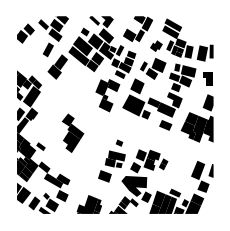

In [8]:
geojson_data.plot(color='black')
plt.axis(False)

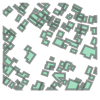

In [9]:
unary_union(geojson_data.geometry.values)


## Check what bit-image it is
We will use an 8 bit image, i.e, with image values ranging from `0-255`.

If it is a 16 bit image, values are between `0-65535` per channel, and we need to convert it to an 8 bit image.

[ref](https://photographylife.com/8-bit-vs-16-bit-images)

In [10]:
# seems to be an 8-bit image already
f = img_data.flatten()
print(f'min: {min(f)}, max: {max(f)}')

min: 0, max: 255


## Create masks
We need to create image masks for training. We can't directly use the geopandas plot as we need to align and adjust the building polygons with each tiff file.

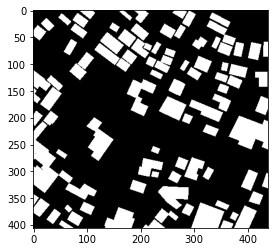

In [11]:
filename = 'AOI_1_RIO_img1200'
m = sol.vector.mask.footprint_mask(
    df = gpd.read_file(f'{GEOJSON_PATH}/Geo_{filename}.geojson'),
    reference_im = f'{SATELLITE_IMAGERY_PATH}/3band_{filename}.tif'
)
plt.imshow(m, cmap='gray')

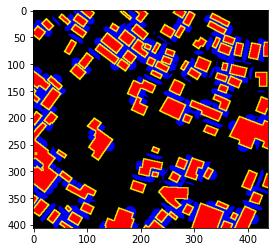

In [12]:
fbc_m = sol.vector.mask.df_to_px_mask(
    df = gpd.read_file(f'{GEOJSON_PATH}/Geo_{filename}.geojson'),
    reference_im = f'{SATELLITE_IMAGERY_PATH}/3band_{filename}.tif',
    channels=['footprint', 'boundary', 'contact'],
    boundary_width=5, contact_spacing=10, meters=True
)
plt.imshow(fbc_m)

Text(0.5, 1.0, 'Building footprint, boundary and contact mask')

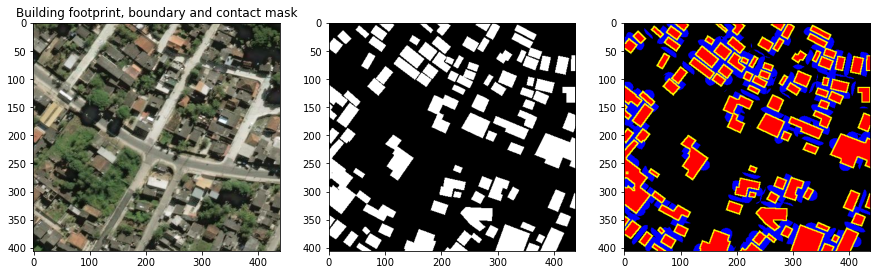

In [20]:
# seeing it all together in an example
f,ax = plt.subplots(1,3, figsize=(15,15))
ax[0].imshow(img_data)
ax[0].set_title('Original image')
ax[1].imshow(m, cmap='gray')
ax[0].set_title('Building footprint mask')
ax[2].imshow(fbc_m)
ax[0].set_title('Building footprint, boundary and contact mask')
